In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\sajad\Datasets\worldpopulationreview.csv")

# Display the structure of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country Name           234 non-null    object
 1   Population (Jan 2024)  224 non-null    object
 2   Population(2023)       234 non-null    object
 3   Area(km)               234 non-null    object
 4   Land Area (Km)         234 non-null    object
 5   Density(/Km)           234 non-null    object
 6   Growth Rate            232 non-null    object
 7   World%                 177 non-null    object
 8   Rank                   234 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 16.6+ KB
None


In [2]:
# Display the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 234
Number of columns: 9


In [3]:
# Display the first few rows of the dataset
print(df.head())

    Country Name Population (Jan 2024) Population(2023) Area(km)  \
0          India         1,436,397,893    1,428,627,663     3.3M   
1          China         1,425,436,213    1,425,671,352     9.7M   
2  United States           341,075,762      339,996,563     9.4M   
3      Indonesia           278,883,459      277,534,122     1.9M   
4       Pakistan           243,270,676      240,485,658   881.9K   

  Land Area (Km) Density(/Km) Growth Rate  World%  Rank  
0             3M          485       0.92%  18.01%     1  
1           9.4M          151      -0.03%   17.8%     2  
2           9.1M           37       0.53%   4.27%     3  
3           1.9M          149       0.82%    3.5%     4  
4         770.9K          318       1.96%   3.06%     5  


In [4]:
# Display the column names
print(df.columns)

Index(['Country Name', 'Population (Jan 2024)', 'Population(2023)', 'Area(km)',
       'Land Area (Km)', 'Density(/Km)', 'Growth Rate', 'World%', 'Rank'],
      dtype='object')


In [5]:
# Count the number of unique countries
num_countries = df['Country Name'].nunique()

# Display the number of countries
print("Number of countries included:", num_countries)

Number of countries included: 234


In [6]:
# Find the country with the highest population density
country_highest_density = df.loc[df['Density(/Km)'].idxmax(), 'Country Name']
highest_density = df['Density(/Km)'].max()

# Display the country with the highest population density
print("Country with the highest population density:", country_highest_density)
print("Population density:", highest_density)

Country with the highest population density: Kenya
Population density: 99


In [7]:
# Find the country with the smallest land area
country_smallest_land_area = df.loc[df['Land Area (Km)'].idxmin(), 'Country Name']
smallest_land_area = df['Land Area (Km)'].min()

# Display the country with the smallest land area
print("Country with the smallest land area:", country_smallest_land_area)
print("Land area:", smallest_land_area)

Country with the smallest land area: Hong Kong
Land area: 1.1K


In [8]:
# Specify the country
country_name = "United States"

# Find the rank of the specified country based on population in January 2024
country_rank = df[df['Country Name'] == country_name]['Rank'].values[0]

# Display the rank of the specified country
print(f"Rank of {country_name} based on population in January 2024:", country_rank)

Rank of United States based on population in January 2024: 3


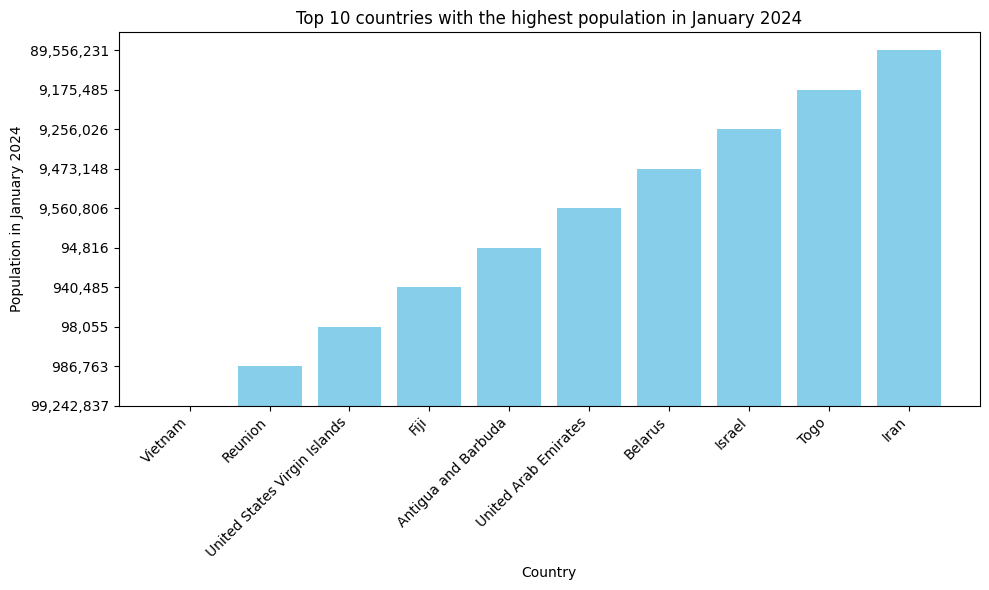

In [14]:
#Top 10 countries with the highest population in January 2024
#%pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort the dataframe by population in January 2024 in descending order
top_10_population_2024 = df.sort_values(by='Population (Jan 2024)', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_population_2024['Country Name'], top_10_population_2024['Population (Jan 2024)'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population in January 2024')
plt.title('Top 10 countries with the highest population in January 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

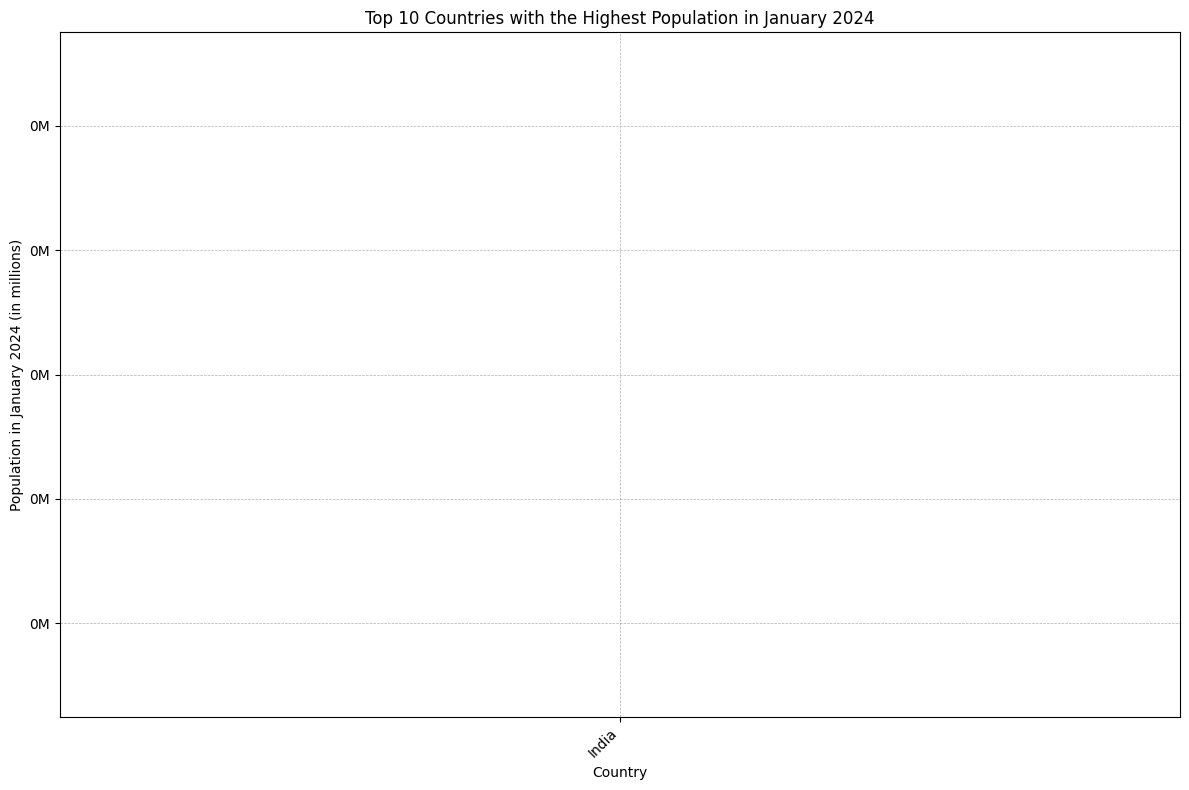

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'df' is your dataframe and it has 'Country Name' and 'Population (Jan 2024)' columns

# Convert population to numeric if it's not already
df['Population (Jan 2024)'] = pd.to_numeric(df['Population (Jan 2024)'], errors='coerce')

# Sort the dataframe by population in descending order and take the top 10
top_10_population_2024 = df.sort_values(by='Population (Jan 2024)', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_population_2024['Country Name'], top_10_population_2024['Population (Jan 2024)'] / 1e6, color='skyblue')

# Set the formatter for the y-axis to display populations in millions
formatter = FuncFormatter(lambda y, _: f'{int(y)}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Population in January 2024 (in millions)')
plt.title('Top 10 Countries with the Highest Population in January 2024')

# Improve layout for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Optionally, add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()